The LeNet-5 CNN Architecture, developed by Yann LeCun in 1998, is one of the pioneering convolutional neural networks (CNNs).
* The architecture was developed to recognize handwritten and machine-printed characters, a function that showcased the potential of deep learning in practical applications.
* This architecture used backpropagation for training CNNs.
* Suitable for smaller datasets due to limited capacity.

## LeNet-5 has a total of 7 layers, excluding the input layer.
* These layers include convolutional layers, pooling (subsampling) layers, and fully connected layers.
* It uses **tanh** activation functions (as opposed to ReLU in modern architectures).

#Let us know Layer-by-Layer Description:

1.   **Input Layer**:
        Accepts a 32x32 grayscale image as input. (Images from datasets like MNIST are padded from 28x28 to 32x32 to fit this architecture.)

2.   **Convolutional Layer 1 (C1)**:
        * Applies 6 filters of size 5x5.
        * Produces an output of 6 feature maps each of size 28x28.

3.   **Pooling Layer 1 (S2)**:
       * Averages values in 2x2 regions with a stride of 2.
       * Reduces the spatial dimensions from 28x28 to 14x14.

4.   **Convolutional Layer 2 (C3)**:
      * Applies 16 filters of size 5x5.
      * Produces an output of 16 feature maps each of size 10x10.

5.   **Pooling Layer 2 (S4)**:
      * Averages values in 2x2 regions with a stride of 2.
      * Reduces the spatial dimensions from 10x10 to 5x5.

6.   **Fully Connected Layer 1 (F5)**:
      Flattens the feature maps and passes them through a dense layer with 120 units.

7.   **Fully Connected Layer 2 (F6)**:
      Passes the output from the previous layer to another dense layer with 84 units.

8.   **Output Layer**:
      * Contains 10 units, representing the 10 digit classes (0–9).
      * Uses a softmax function for classification.


### Parameter Sharing
LeNet-5 utilizes shared weights in the convolutional layers to reduce the number of trainable parameters.

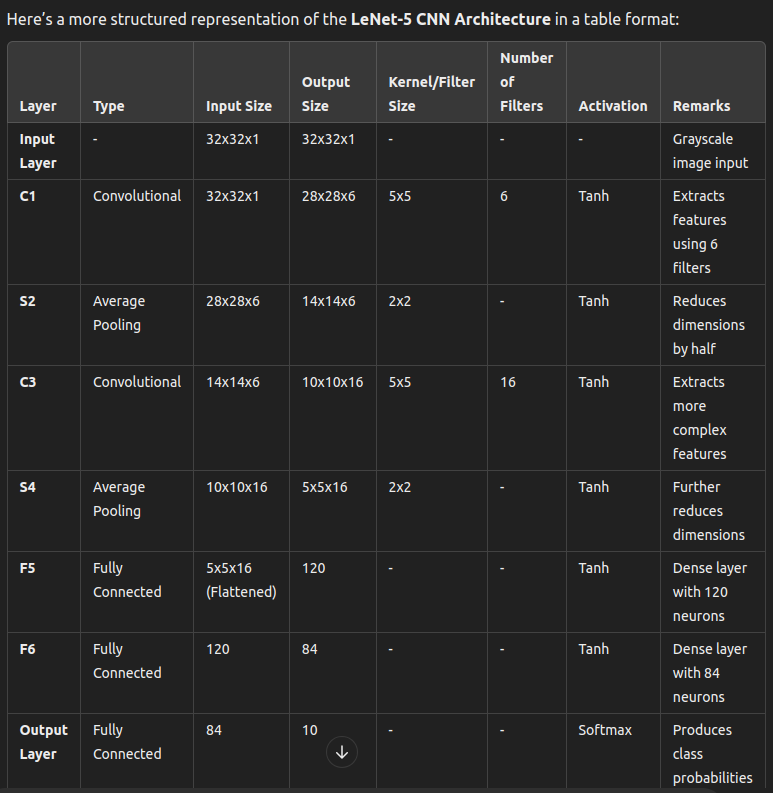

To know more:
* https://www.datasciencecentral.com/lenet-5-a-classic-cnn-architecture/
* https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b

### Image Classification with the CIFAR-10 Dataset Using the LeNet-5 CNN Architecture

In [1]:
# Step 1: Importing the necessary libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Step 2: Loading and pre-processing of the CIFAR-10 dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Step 3: Normalizing pixel values to be between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

* One-hot encoding converts categories into a numeric format, enabling models to process them.
* Assigning numeric values (e.g., 1, 2, 3) to categories implies an ordinal relationship that may not exist.
* One-hot encoding removes this unintended relationship by treating each category as independent.
* In classification tasks, the softmax activation function is often used in the output layer.
* One-hot encoding creates a binary vector with a "1" for the true class and "0" elsewhere, which aligns with the softmax output's probability distribution.
* one-hot encoding ensures categorical variables are appropriately represented without introducing unintended relationships or biases, making it an essential preprocessing step for classification tasks.

In [4]:
# Step 4: One-hot encode the labels.
# This step is required to use the loss function "categorical_crossentropy"

train_labels = to_categorical(train_labels, 10) # here 10 is for- It ensures the output one-hot encoded vectors have a length of 10.
test_labels = to_categorical(test_labels, 10)

In [5]:
# Step 5: Defining the class names for CIFAR-10 images

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

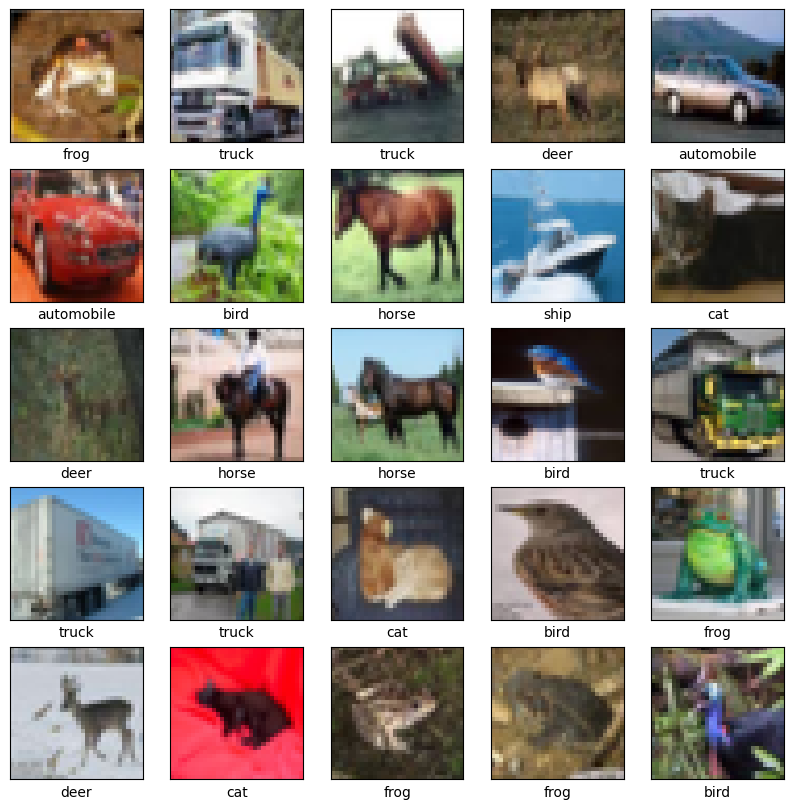

In [6]:
# Step 6: Visualizing a few training images from the CIFAR-10 dataset.

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i].argmax()]) # Using argmax to get the label index

plt.show()

In [7]:
# Step 7: Building the CNN model (LeNet-5 CNN Architecture)

model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='tanh'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(120, (5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 8: Printing the model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 9: Compiling the CNN model

model.compile(optimizer='adam', # Adam uses a default learning rate of 0.001
loss='categorical_crossentropy',
metrics=['accuracy'])

In [10]:
# Step 10: Training the CNN model.
trained_model = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3185 - loss: 1.8989 - val_accuracy: 0.4045 - val_loss: 1.6714
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.4276 - loss: 1.6227 - val_accuracy: 0.4657 - val_loss: 1.4975
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4845 - loss: 1.4483 - val_accuracy: 0.4910 - val_loss: 1.4253
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5204 - loss: 1.3544 - val_accuracy: 0.5173 - val_loss: 1.3641
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.5399 - loss: 1.2963 - val_accuracy: 0.5255 - val_loss: 1.3505
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5633 - loss: 1.2382 - val_accuracy: 0.5232 - val_loss: 1.3531
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5741 - loss: 1.1992 - val_accuracy: 0.5288 - val_loss: 1.3335
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5936 -

In [11]:
# Step 11: Evaluating the performance of the CNN model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy is: {test_acc}')

313/313 - 3s - 9ms/step - accuracy: 0.5461 - loss: 1.3261

Test accuracy is: 0.5461000204086304


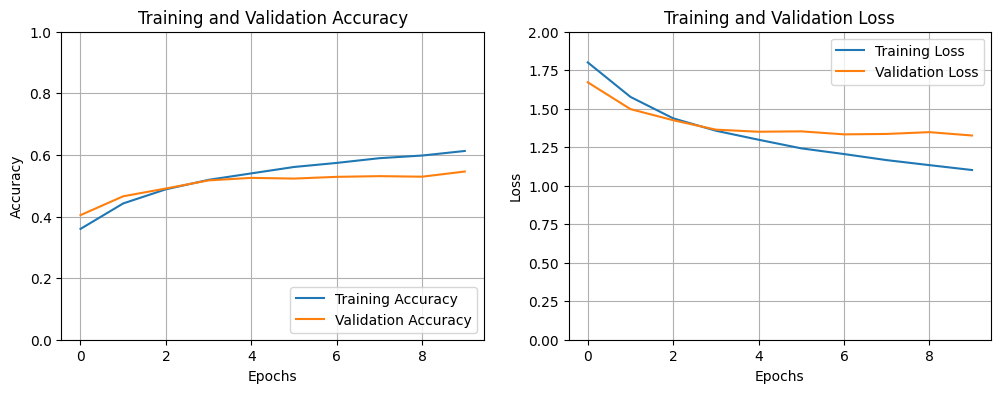

In [12]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()